# Notebook that Simulates Kalman Filter Algorithm

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

/home/professor/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Kalman Implementation

In [6]:
def kalman_filter(initial_guess,guess_variance, measurements,measurement_variances, process_noise=0.0, plot = False, true_value = None,precision = 0.1):
    #initial estimations
    state_etimation = initial_guess;
    estimation_variance = guess_variance;
    N = len(measurement_variances)
    #prediction
    predicted_estimation = state_etimation;
    predicted_estimation_variance = guess_variance+process_noise;

    estimates = np.zeros(N+1)
    estimates[0] = state_etimation;
    Kalman_gains = np.zeros(N)
    if plot:
        plt.scatter(0,state_etimation,color = 'red',label = "initial_state");
    
    #iterating in for all given measurements
    for i in range(N):
        #Calculate the Kalman Gian
        Kalman_Gian = predicted_estimation_variance/(predicted_estimation_variance+measurement_variances[i])
        Kalman_gains[i] = Kalman_Gian
        #Compute the current State Estimate
        state_etimation = predicted_estimation + Kalman_Gian*(measurements[i]-predicted_estimation)
        estimates[i+1] = state_etimation
        estimation_variance = (1-Kalman_Gian)*predicted_estimation_variance

        #Compute the prediction using dynamic Model
        predicted_estimation = state_etimation;
        predicted_estimation_variance = estimation_variance+process_noise;
    if plot:
        iterations = np.arange(0,N+1)
        plt.plot(iterations[1:],estimates[1:],marker='s',markersize=5,label = "estimates")
        plt.plot(iterations[1:],measurements,marker = 10, label = "measurements")
        if true_value is not None:
            t_vals = np.ones(N+1)*true_value
            plt.plot(iterations[1:], t_vals[1:],marker=4,label = "true values")
        plt.xlabel ("Iterations")
        plt.title("Kalman Filter Simulations")
        plt.legend()
        plt.show()
        plt.figure();
        plt.plot(Kalman_gains,marker="o",markersize = 5)
        plt.title("Kalman Gians")
        plt.xlabel("Iterations")
    return estimates
    

## Simulation Results

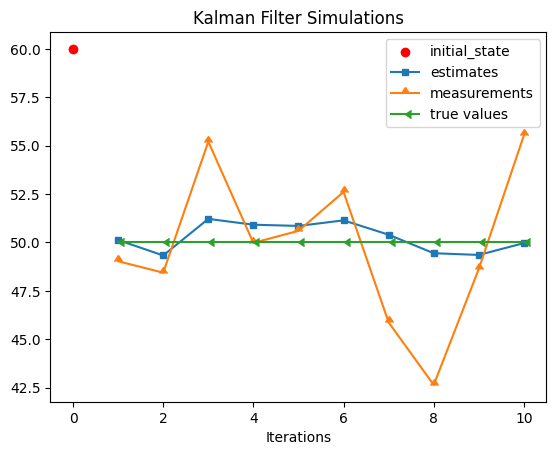

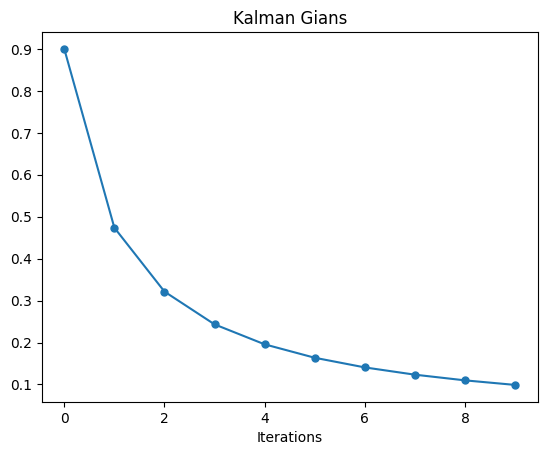

In [7]:
measurements = np.array([49.03,48.44,55.21,49.98,50.6,52.61,45.87,42.64,48.64,55.54])
variances = 25*np.ones(len(measurements))
initial_estime = 60
initial_var = 225
true_value = 50
estims = kalman_filter(initial_estime,initial_var,measurements, variances, plot= True, true_value = 50)